Problem: 

- Developped a V1 of the classification model
- Can be better, it helped and was enough to sort images
- We need to develop a better model, with better precision but also, lower in weight 

Solution:

- Develop a model that would classify if the image is in the correct way or not

Needs: 

- Download more images 
- Develop the model
- Trim the model

In [107]:
import pandas as pd
import numpy as np
import copy
import os
import random
import requests
from tqdm import tqdm

try:
    # Get the current directory of the notebook
    file_dir = os.getcwd()
    app_dir = os.path.dirname(file_dir)

    # Define the path to the file in the /files directory
    #file_path = os.path.join(app_dir, 'files', 'cleaned_data.csv')
    file_path='cleaned_img_data.csv'
    # Now you can use the file_path to access your file
    with open(file_path, 'r') as file:
        data = pd.read_csv(file_path, sep = "\t", usecols=["code", "pnns_groups_1", "image_1", "image_2", "image_3", "image_4"])

except:
    # Get the directory of the script
    script_dir = os.path.dirname(os.path.abspath(__file__))

    # Go up one level to the parent directory (assuming the script is in the 'app' directory)
    app_dir = os.path.dirname(script_dir)

    # Define the path to the file in the /files directory
    file_path = os.path.join(app_dir, 'files', 'cleaned_img_data.csv')

    # Now you can use the file_path to access your file
    with open(file_path, 'r') as file:
        data = pd.read_csv(file_path, sep = "\t", usecols=["code", "pnns_groups_1", "image_1", "image_2", "image_3", "image_4"])

/var/folders/2f/rfnwlqbn4kn5mss8s54qbyhh0000gn/T/ipykernel_2452/2216185034.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep = "\t", usecols=["code", "pnns_groups_1", "image_1", "image_2", "image_3", "image_4"])


In [36]:
def get_code(url):
    # Extract the product code from the Open Food Facts image URL
    try:
        parts = url.split('/')
        
        # Short code format
        if parts[-3] == 'products':
            return parts[-2]
        
        # Long code format
        else:
            code = parts[-5] + parts[-4] + parts[-3] + parts[-2]
            return code.lstrip('0')  # Remove leading zeros
    except:
        pass

    return np.nan

In [119]:
# Function to download images from the urls, ramdomly
# image_urls: list of urls to use for picking the images
# save_folder: Folder to save the images
# number: Number of images to download
def download_images(image_urls, save_folder, number = 10):

    len_files = len(os.listdir(save_folder))

    # We select n images by random
    randomized_list = random.sample(image_urls, number)
    
    for i in range(number):
        
        # The selected image
        image = randomized_list[i]
        
        # We search if the image was already downloaded or if there is no image available
        if get_code(image) in os.listdir(save_folder) + [np.nan]:
            
            while get_code(image) in os.listdir(save_folder) + [np.nan]:
                image = random.sample(image_urls, 1)[0]
        
        try:
            # We get the image data
            response = requests.get(image)
            response.raise_for_status()

            # Extract the filename from the URL
            filename = os.path.join(save_folder, f"{get_code(image)}.jpg")

            # Save the image to the specified folder
            with open(filename, 'wb') as f:
                f.write(response.content)

        except requests.exceptions.RequestException as e:
            print(f"Failed loading url: {image}")

In [120]:
def get_image_by_pnns(save_folder, df, pnns_groups, image_number, number):
    
    # Create the folder if it doesn't exist
    os.makedirs(save_folder, exist_ok=True)
    
    print("Saving files in %s" %save_folder)
    
    list_pnns_groups = list(df[pnns_groups].unique())
    
    for pnns in tqdm(list_pnns_groups, desc="Progress"):
        
        image_urls = list(df.loc[df[pnns_groups] == pnns, image_number])
        
        # A minimum
        if len(image_urls) > 50:
            download_images(image_urls, save_folder, number)

In [79]:
data.value_counts("pnns_groups_1")

pnns_groups_1
Sugary snacks              29867
unknown                    28876
Cereals and potatoes       28035
Composite foods            16891
Milk and dairy products    16444
Fish Meat Eggs             16320
Fruits and vegetables      15749
Fat and sauces             13347
Beverages                  13181
Salty snacks               11399
Alcoholic beverages           12
Name: count, dtype: int64

We can create the different sub folder

In [104]:
# Create the main 'images' folder
save_folder = 'images/train/front'

get_image_by_pnns(save_folder, data, "pnns_groups_1", "image_1", 100)


Saving files in images/train/front
pnns_groups_1: Fruits and vegetables
pnns_groups_1: Sugary snacks
pnns_groups_1: Fat and sauces
pnns_groups_1: Composite foods
pnns_groups_1: Salty snacks
pnns_groups_1: unknown
pnns_groups_1: Milk and dairy products
pnns_groups_1: Fish Meat Eggs
pnns_groups_1: Cereals and potatoes
pnns_groups_1: Beverages
pnns_groups_1: Alcoholic beverages


In [100]:
# Create the main 'images' folder
save_folder = 'images/test/front'

get_image_by_pnns(save_folder, data, "pnns_groups_1", "image_1", 20)

Saving files in images/test/front
pnns_groups_1: Fruits and vegetables
pnns_groups_1: Sugary snacks
pnns_groups_1: Fat and sauces
pnns_groups_1: Composite foods
pnns_groups_1: Salty snacks
pnns_groups_1: unknown
pnns_groups_1: Milk and dairy products
pnns_groups_1: Fish Meat Eggs
pnns_groups_1: Cereals and potatoes
pnns_groups_1: Beverages
pnns_groups_1: Alcoholic beverages


In [102]:
# Create the main 'images' folder
save_folder = 'images/validation/front'

get_image_by_pnns(save_folder, data, "pnns_groups_1", "image_1", 40)

Saving files in images/validation/front
pnns_groups_1: Fruits and vegetables
pnns_groups_1: Sugary snacks
pnns_groups_1: Fat and sauces
pnns_groups_1: Composite foods
pnns_groups_1: Salty snacks
pnns_groups_1: unknown
pnns_groups_1: Milk and dairy products
pnns_groups_1: Fish Meat Eggs
pnns_groups_1: Cereals and potatoes
pnns_groups_1: Beverages
pnns_groups_1: Alcoholic beverages


In [89]:
data[data.image_2.notna()].value_counts("pnns_groups_1")

pnns_groups_1
Sugary snacks              27982
Cereals and potatoes       26321
unknown                    24962
Composite foods            15860
Fruits and vegetables      15061
Milk and dairy products    14915
Fish Meat Eggs             14914
Beverages                  12263
Fat and sauces             12086
Salty snacks               11051
Alcoholic beverages           12
Name: count, dtype: int64

In [105]:
# Create the main 'images' folder
save_folder = 'images/train/back'

get_image_by_pnns(save_folder, data, "pnns_groups_1", "image_2", 100)

Saving files in images/train/back
pnns_groups_1: Fruits and vegetables
pnns_groups_1: Sugary snacks
pnns_groups_1: Fat and sauces
pnns_groups_1: Composite foods
pnns_groups_1: Salty snacks
pnns_groups_1: unknown
pnns_groups_1: Milk and dairy products
pnns_groups_1: Fish Meat Eggs
pnns_groups_1: Cereals and potatoes
pnns_groups_1: Beverages
pnns_groups_1: Alcoholic beverages


In [101]:
# Create the main 'images' folder
save_folder = 'images/test/back'

get_image_by_pnns(save_folder, data, "pnns_groups_1", "image_2", 20)

Saving files in images/test/back
pnns_groups_1: Fruits and vegetables
pnns_groups_1: Sugary snacks
pnns_groups_1: Fat and sauces
pnns_groups_1: Composite foods
pnns_groups_1: Salty snacks
pnns_groups_1: unknown
pnns_groups_1: Milk and dairy products
pnns_groups_1: Fish Meat Eggs
pnns_groups_1: Cereals and potatoes
pnns_groups_1: Beverages
pnns_groups_1: Alcoholic beverages


In [103]:
# Create the main 'images' folder
save_folder = 'images/validation/back'

get_image_by_pnns(save_folder, data, "pnns_groups_1", "image_2", 40)

Saving files in images/validation/back
pnns_groups_1: Fruits and vegetables
pnns_groups_1: Sugary snacks
pnns_groups_1: Fat and sauces
pnns_groups_1: Composite foods
pnns_groups_1: Salty snacks
pnns_groups_1: unknown
pnns_groups_1: Milk and dairy products
pnns_groups_1: Fish Meat Eggs
pnns_groups_1: Cereals and potatoes
pnns_groups_1: Beverages
pnns_groups_1: Alcoholic beverages


We can delete bad images in each folder, to have a better model at the end.

In [106]:
for file in ['train/front/', 'train/back/', 'test/front/', 'test/back/', 'validation/front/', 'validation/back/']:
    print(f"{file} number of images: {len(os.listdir('images/'+file))}")

train/front/ number of images: 966
train/back/ number of images: 941
test/front/ number of images: 190
test/back/ number of images: 186
validation/front/ number of images: 390
validation/back/ number of images: 367


For a first try, we have a good number of pictures

In [121]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.xception import Xception

import time
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

from plot_keras_history import show_history, plot_history
#from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras import optimizers
from plot_keras_history import show_history, plot_history

2024-01-07 03:30:30.808973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [148]:
def create_model_fct(optimizer='rmsprop'):
    """
    Return a Xception model trained on imagenet
    """
    
    model_base = Xception(include_top=False, weights="imagenet", input_shape=(299, 299, 3))
    preprocess_input = tf.keras.applications.xception.preprocess_input

    # We keep the weights of the model trained on imagenet
    for layer in model_base.layers:
        layer.trainable = False

    x = model_base.output
    # We add the last layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # We want to predict 2 classes
    predictions = Dense(2, activation='softmax')(x)

    # We define the model
    model = Model(inputs=model_base.input, outputs=predictions)
    
    # We compile it
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    #alternative : adam
    
    print(model.summary())
    
    return model, preprocess_input

In [283]:
# We create the model
with tf.device('/gpu:0'): 
    model, preprocess_input = create_model_fct()


# Callback
# We follow the loss
# We stop training if the model has not improve after x step (patience)
# We register the model after each improvement

model_save_path = "./model_best_weights.h5"
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
callbacks_list = [checkpoint, es]

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_11[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

 ormalization)                                                                                    
                                                                                                  
 block4_sepconv2_act (Activ  (None, 37, 37, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 37, 37, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 37, 37, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
          

 ation)                                                                                           
                                                                                                  
 block7_sepconv1 (Separable  (None, 19, 19, 728)          536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 19, 19, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 19, 19, 728)          0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
          

 block9_sepconv3_bn (BatchN  (None, 19, 19, 728)          2912      ['block9_sepconv3[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 add_103 (Add)               (None, 19, 19, 728)          0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_102[0][0]']             
                                                                                                  
 block10_sepconv1_act (Acti  (None, 19, 19, 728)          0         ['add_103[0][0]']             
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 19, 19, 728)          536536    ['block10_sepconv1_act[0][0]']
 eConv2D) 

                                                                                                  
 block12_sepconv3_act (Acti  (None, 19, 19, 728)          0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 19, 19, 728)          536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 19, 19, 728)          2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_106 (

In [124]:
def dataset_fct(path, preprocess, image_size = (299,299), validation_split=0, batch_size = 32, data_type=None):
    dataset = tf.keras.utils.image_dataset_from_directory(
        path, 
        labels='inferred', #Subfolder where separated, so the labels are inferred
        label_mode='categorical',
        class_names=["back", "front"],  # 0 = back, 1 = front
        batch_size=batch_size, 
        image_size=(image_size),
        shuffle=True, 
        seed=42, 
        validation_split=validation_split, 
        subset=data_type
    )
    if preprocess:
        # On applique le pré processing avant de retourner les images
        dataset = dataset.map(lambda x, y: (preprocess(x), y))
    
    return dataset


In [274]:
# We prepare the files
dataset_train = dataset_fct("images/train", preprocess_input, validation_split=0, data_type=None)
dataset_test = dataset_fct("images/test", preprocess_input, validation_split=0, data_type=None)
dataset_val = dataset_fct("images/validation", preprocess_input, validation_split=0, data_type=None)

Found 1905 files belonging to 2 classes.
Found 374 files belonging to 2 classes.
Found 755 files belonging to 2 classes.


In [275]:
# Optimization of dataset

AUTOTUNE = tf.data.experimental.AUTOTUNE

dataset_train = dataset_train.cache().prefetch(buffer_size=AUTOTUNE)
dataset_val = dataset_val.cache().prefetch(buffer_size=AUTOTUNE)
dataset_test = dataset_test.cache().prefetch(buffer_size=AUTOTUNE)

Now we can train the model

In [127]:
time1 = time.time()

with tf.device('/gpu:0'): 
    history = model.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=32, epochs=50, callbacks=callbacks_list, verbose=1)

elapsed_time = time.time() - time1

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.2431 - accuracy: 0.9108
Epoch 1: val_loss improved from inf to 0.11421, saving model to ./model_best_weights.h5


/Users/ruben/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 227s 4s/step - loss: 0.2431 - accuracy: 0.9108 - val_loss: 0.1142 - val_accuracy: 0.9589
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.1402 - accuracy: 0.9501
Epoch 2: val_loss did not improve from 0.11421
60/60 [==============================] - 219s 4s/step - loss: 0.1402 - accuracy: 0.9501 - val_loss: 0.1335 - val_accuracy: 0.9523
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.1239 - accuracy: 0.9564
Epoch 3: val_loss did not improve from 0.11421
60/60 [==============================] - 216s 4s/step - loss: 0.1239 - accuracy: 0.9564 - val_loss: 0.1284 - val_accuracy: 0.9536
Epoch 4/50
60/60 [==============================] - ETA: 0s - loss: 0.1103 - accuracy: 0.9606
Epoch 4: val_loss did not improve from 0.11421
60/60 [==============================] - 215s 4s/step - loss: 0.1103 - accuracy: 0.9606 - val_loss: 0.2955 - val_accuracy: 0.9033
Epoch 4: early stopping


In [276]:
result_models = []

In [284]:
# Let's see the results

model.load_weights(model_save_path)

time_dif = time.time()

loss, accuracy_train = model.evaluate(dataset_train, verbose=True)
print("Accuracy on the train dataset: {:.2f}%".format(accuracy_train*100))

elapsed_time = time.time() - time_dif

loss, accuracy_val = model.evaluate(dataset_val, verbose=True)
print("Accuracy on the validation dataset: {:.2f}%".format(accuracy_val*100))

loss, accuracy_test = model.evaluate(dataset_test, verbose=True)
print("Accuracy on the test dataset:  {:.2f}%".format(accuracy_test*100))

# We log the results, model name, path, time by image, accuracy and fitting between train and test
result_models.append(["Xception", model_save_path, elapsed_time / 1905, 
                      accuracy_train, accuracy_val, accuracy_test, accuracy_train/accuracy_test])

60/60 [==============================] - 161s 3s/step - loss: 0.1168 - accuracy: 0.9622
Accuracy on the train dataset: 96.22%
24/24 [==============================] - 65s 3s/step - loss: 0.1142 - accuracy: 0.9589
Accuracy on the validation dataset: 95.89%
12/12 [==============================] - 30s 3s/step - loss: 0.1766 - accuracy: 0.9519
Accuracy on the test dataset:  95.19%


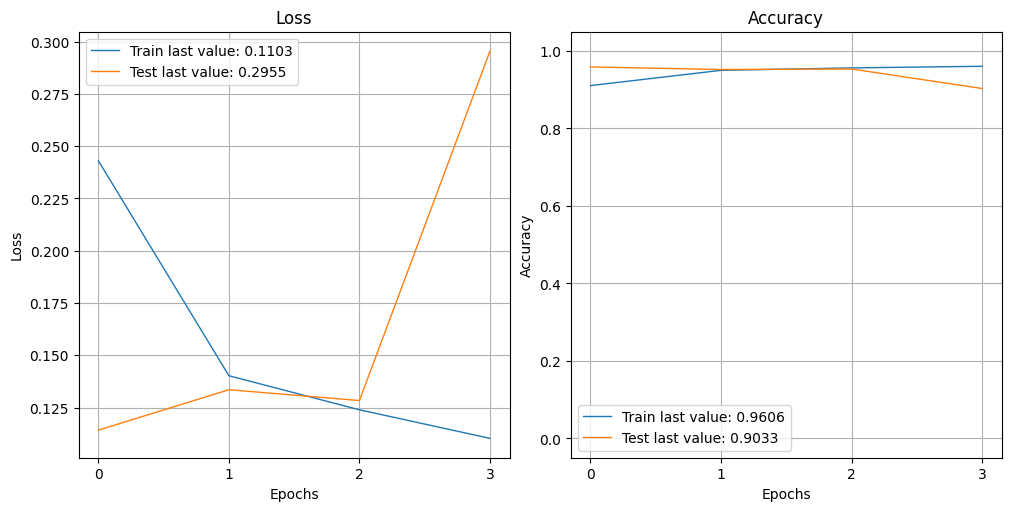

In [129]:
# The graphic
show_history(history)

In [130]:
# Fonctions permettant de récupérer les labels 

def extract_labels(x, y):
    return y

# Ils sont retournés encodés numpy, donc on utilise np.argmax pour retourner encodé
def extract_all_labels(df) : 
    real_labels = df.map(extract_labels)
    real_labels = np.concatenate([labels.numpy() for labels in real_labels])
    real_labels = np.argmax(real_labels, axis = 1)
    
    return real_labels

# Fonction affichant la matrice de confusion
def matrice_confusion(real_labels, predicted_labels):
    
    conf_mat = metrics.confusion_matrix(real_labels, predicted_labels)
    
    df_cm = pd.DataFrame(conf_mat, index = ['Back', 'Front'],
                      columns = ['Back', 'Front'])
    plt.figure(figsize = (6,4))
    
    sns.heatmap(df_cm, annot=True, cmap="Blues")

# Fonction affichant plusieurs métriques comparant les résultats de prédictions vs réels et matrice de confusion
def results_prediction(predicted_labels, real_labels):
    
    print(metrics.classification_report(real_labels, predicted_labels))
    
    # on appel la fonction matrice_confusion
    matrice_confusion(real_labels, predicted_labels)


12/12 [==============================] - 32s 3s/step
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       169
           1       0.99      0.92      0.95       205

    accuracy                           0.95       374
   macro avg       0.95      0.96      0.95       374
weighted avg       0.96      0.95      0.95       374



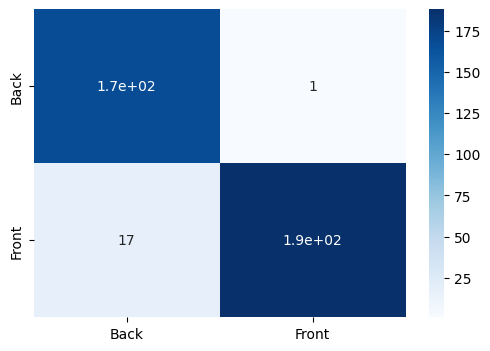

In [131]:
real_test_label = extract_all_labels(dataset_test)
predict_test = model.predict(dataset_test)
predict_test_label = np.argmax(predict_test, axis = 1)
results_prediction(real_test_label, predict_test_label)

60/60 [==============================] - 164s 3s/step
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       886
           1       0.99      0.94      0.96      1019

    accuracy                           0.96      1905
   macro avg       0.96      0.96      0.96      1905
weighted avg       0.96      0.96      0.96      1905



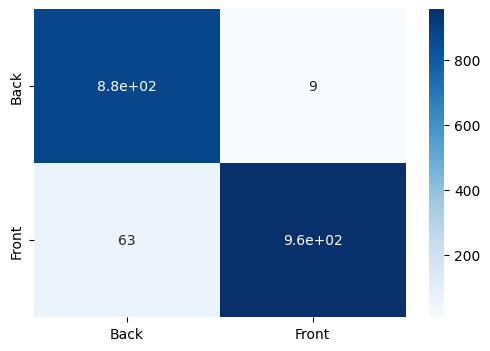

In [132]:
real_train_label = extract_all_labels(dataset_train)
predict_train = model.predict(dataset_train)
predict_train_label = np.argmax(predict_train, axis = 1)
results_prediction(real_train_label, predict_train_label)

24/24 [==============================] - 59s 2s/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       341
           1       0.99      0.93      0.96       414

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755



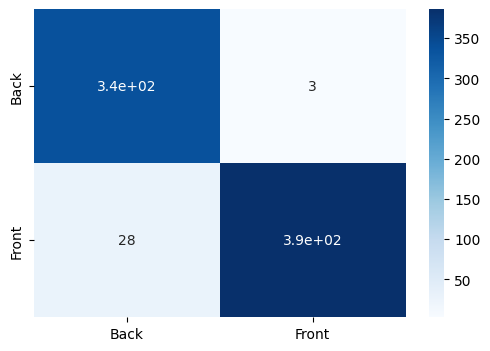

In [133]:
real_val_label = extract_all_labels(dataset_val)
predict_val = model.predict(dataset_val)
predict_val_label = np.argmax(predict_val, axis = 1)
results_prediction(real_val_label, predict_val_label)

In [134]:
# Fonction permettant d'afficher des images précises dans les batchs

def show_selected_img(dataset, batch_index = 2, image_index_within_batch = 3, Rescale = True):

    for i, (batch_images, batch_labels) in enumerate(dataset):
        if i == batch_index:

            image = batch_images[image_index_within_batch]
            label = batch_labels[image_index_within_batch]
            plt.figure(figsize=(5, 5))

            # On rescale l'image pour l'affichage
            rescaled_image = tf.image.convert_image_dtype(image, dtype=tf.uint8)
            plt.imshow(rescaled_image)

            plt.axis("off")
            plt.show()

image : 60 batch : 1 batch_image : 28
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 82 %


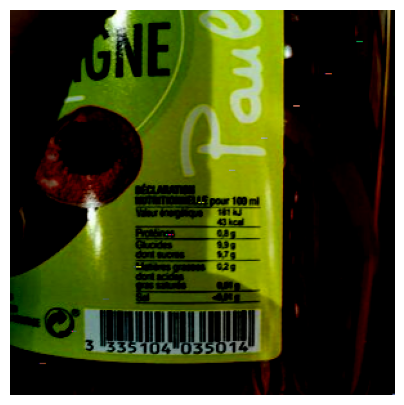

image : 66 batch : 2 batch_image : 2
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 97 %


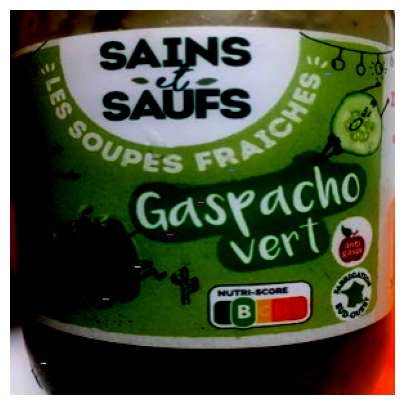

image : 116 batch : 3 batch_image : 20
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 99 %


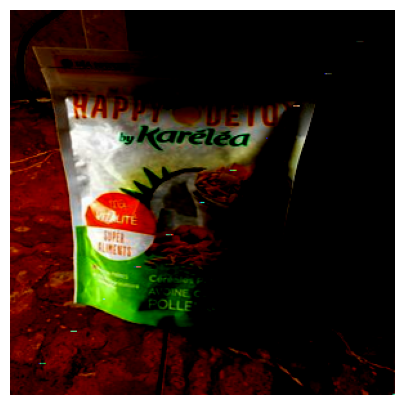

image : 121 batch : 3 batch_image : 25
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 74 %


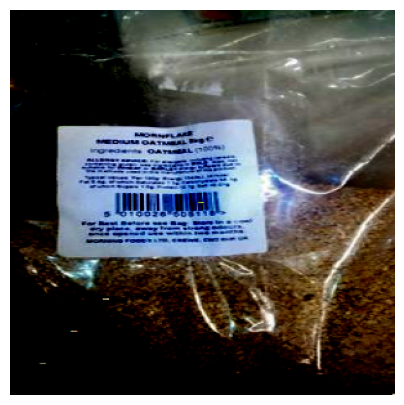

image : 122 batch : 3 batch_image : 26
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 99 %


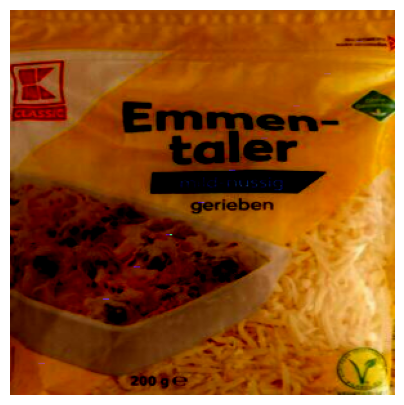

image : 127 batch : 3 batch_image : 31
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 99 %


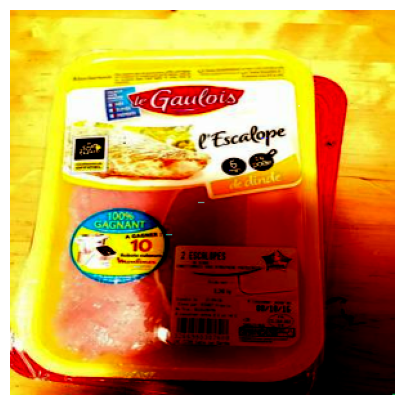

image : 135 batch : 4 batch_image : 7
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 87 %


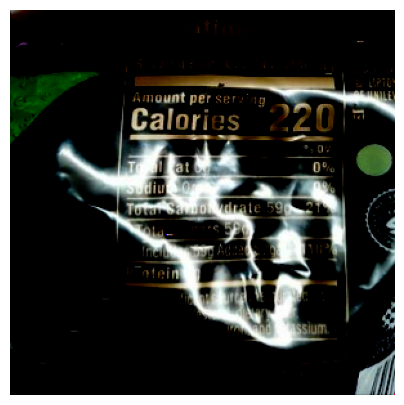

image : 144 batch : 4 batch_image : 16
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 96 %


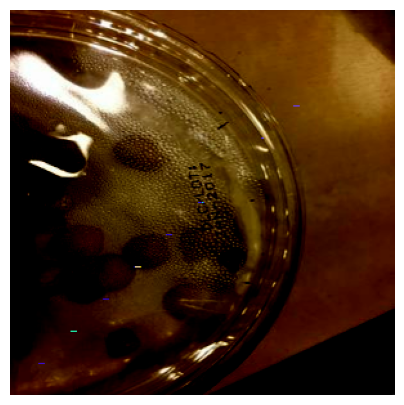

image : 153 batch : 4 batch_image : 25
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 68 %


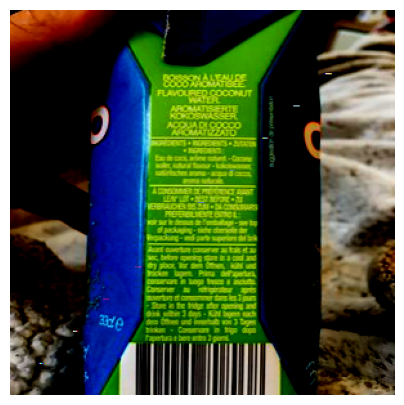

image : 168 batch : 5 batch_image : 8
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 58 %


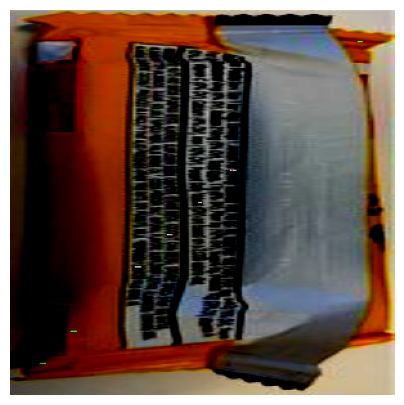

image : 186 batch : 5 batch_image : 26
Bonne prédiction : Front
Fausse prédiction : Back 
Pourcentage de probabilité : 61 %


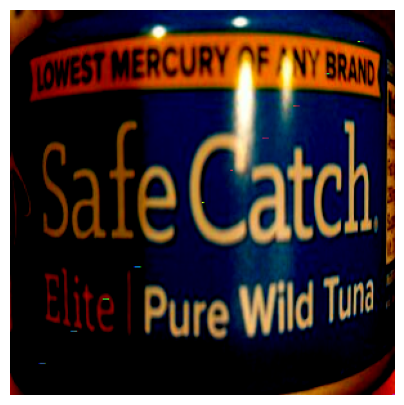

image : 191 batch : 5 batch_image : 31
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 55 %


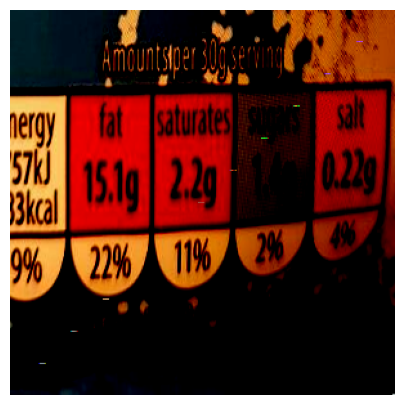

image : 245 batch : 7 batch_image : 21
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 83 %


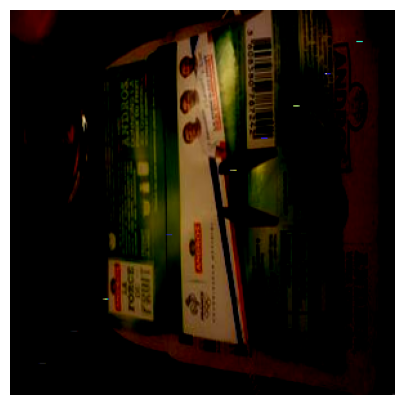

image : 305 batch : 9 batch_image : 17
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 97 %


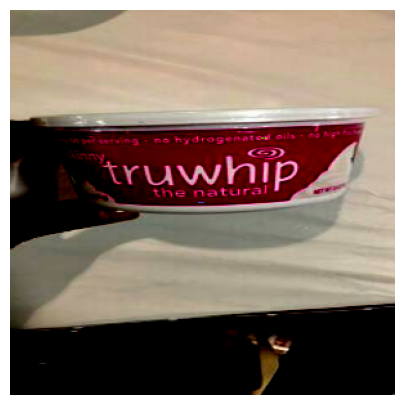

image : 309 batch : 9 batch_image : 21
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 90 %


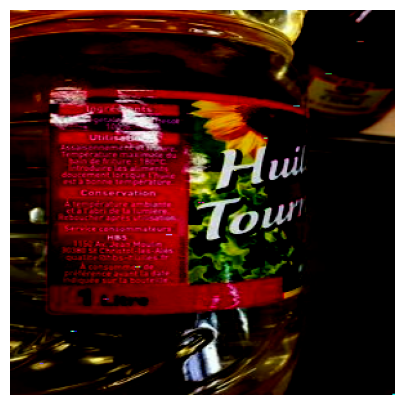

image : 334 batch : 10 batch_image : 14
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 94 %


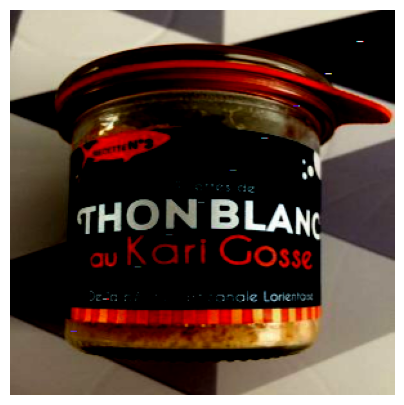

image : 357 batch : 11 batch_image : 5
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 92 %


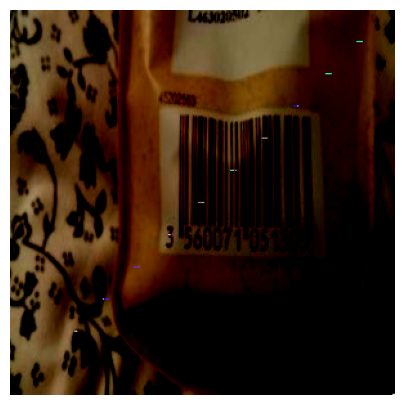

image : 359 batch : 11 batch_image : 7
Bonne prédiction : Back
Fausse prédiction : Front 
Pourcentage de probabilité : 57 %


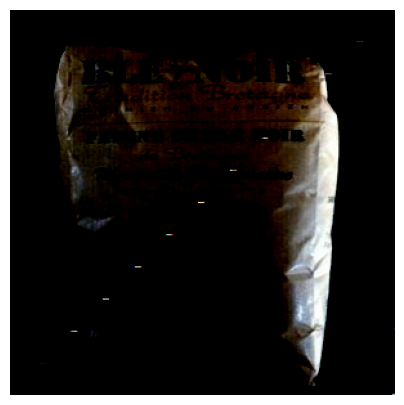

In [135]:
# On récupère les pourcentages de probabilité pour le label
probabilite_pourcentage = np.max(predict_test, axis=1)

prediction = {1:'Front', 0:'Back'}

# On parcours et on compare les résultats de label entre prédits et vrais labels
for i in range(len(real_test_label)):
  # Si ça ne correspond pas, on affiche l'image
  if real_test_label[i] != predict_test_label[i]:
    # On recherche le batch et l'image
    batch = int(np.floor(i/32))
    batch_image = i - (32 * batch)

    print("image :", i, "batch :", batch, "batch_image :", batch_image)

    print("Bonne prédiction :", prediction[real_test_label[i]])
    print("Fausse prédiction : %s " %prediction[predict_test_label[i]])
    print("Pourcentage de probabilité : %d %%" %(probabilite_pourcentage[i] * 100))

    show_selected_img(dataset_test, batch, batch_image)

In [139]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [285]:
# We create the model
with tf.device('/gpu:0'): 
    model, preprocess_input = create_model_fct()


# Callback
# We follow the loss
# We stop training if the model has not improve after x step (patience)
# We register the model after each improvement

model_save_path = "./model_best_weights_V2.h5"
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)
callbacks_list = [checkpoint, es, reduce_lr]

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_12[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

 ormalization)                                                                                    
                                                                                                  
 block4_sepconv2_act (Activ  (None, 37, 37, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 37, 37, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 37, 37, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
          

 ation)                                                                                           
                                                                                                  
 block7_sepconv1 (Separable  (None, 19, 19, 728)          536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 19, 19, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 19, 19, 728)          0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
          

 block9_sepconv3_bn (BatchN  (None, 19, 19, 728)          2912      ['block9_sepconv3[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 add_115 (Add)               (None, 19, 19, 728)          0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_114[0][0]']             
                                                                                                  
 block10_sepconv1_act (Acti  (None, 19, 19, 728)          0         ['add_115[0][0]']             
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 19, 19, 728)          536536    ['block10_sepconv1_act[0][0]']
 eConv2D) 

                                                                                                  
 block12_sepconv3_act (Acti  (None, 19, 19, 728)          0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 19, 19, 728)          536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 19, 19, 728)          2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_118 (

In [142]:
time1 = time.time()

with tf.device('/gpu:0'): 
    history = model.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=32, epochs=50, callbacks=callbacks_list, verbose=1)

elapsed_time = time.time() - time1

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.9055
Epoch 1: val_loss improved from inf to 0.12087, saving model to ./model_best_weights_V2.h5
60/60 [==============================] - 195s 3s/step - loss: 0.2474 - accuracy: 0.9055 - val_loss: 0.1209 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.1441 - accuracy: 0.9444
Epoch 2: val_loss did not improve from 0.12087
60/60 [==============================] - 193s 3s/step - loss: 0.1441 - accuracy: 0.9444 - val_loss: 0.1465 - val_accuracy: 0.9457 - lr: 0.0010
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.1219 - accuracy: 0.9606
Epoch 3: val_loss did not improve from 0.12087
60/60 [==============================] - 201s 3s/step - loss: 0.1219 - accuracy: 0.9606 - val_loss: 0.1666 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 4/50
60/60 [==============================] - ETA: 0s - loss: 0.1002 - accuracy: 0.9701
Epoch 4: v

In [286]:
# Let's see the results

model.load_weights(model_save_path)

time_dif = time.time()

loss, accuracy_train = model.evaluate(dataset_train, verbose=True)
print("Accuracy on the train dataset: {:.2f}%".format(accuracy_train*100))

elapsed_time = time.time() - time_dif

loss, accuracy_val = model.evaluate(dataset_val, verbose=True)
print("Accuracy on the validation dataset: {:.2f}%".format(accuracy_val*100))

loss, accuracy_test = model.evaluate(dataset_test, verbose=True)
print("Accuracy on the test dataset:  {:.2f}%".format(accuracy_test*100))

# We log the results, model name, path, time by image, accuracy and fitting between train and test
result_models.append(["Xception", model_save_path, elapsed_time / 1905, 
                      accuracy_train, accuracy_val, accuracy_test, accuracy_train/accuracy_test])

60/60 [==============================] - 156s 3s/step - loss: 0.0550 - accuracy: 0.9795
Accuracy on the train dataset: 97.95%
24/24 [==============================] - 61s 3s/step - loss: 0.1034 - accuracy: 0.9642
Accuracy on the validation dataset: 96.42%
12/12 [==============================] - 31s 3s/step - loss: 0.1845 - accuracy: 0.9492
Accuracy on the test dataset:  94.92%


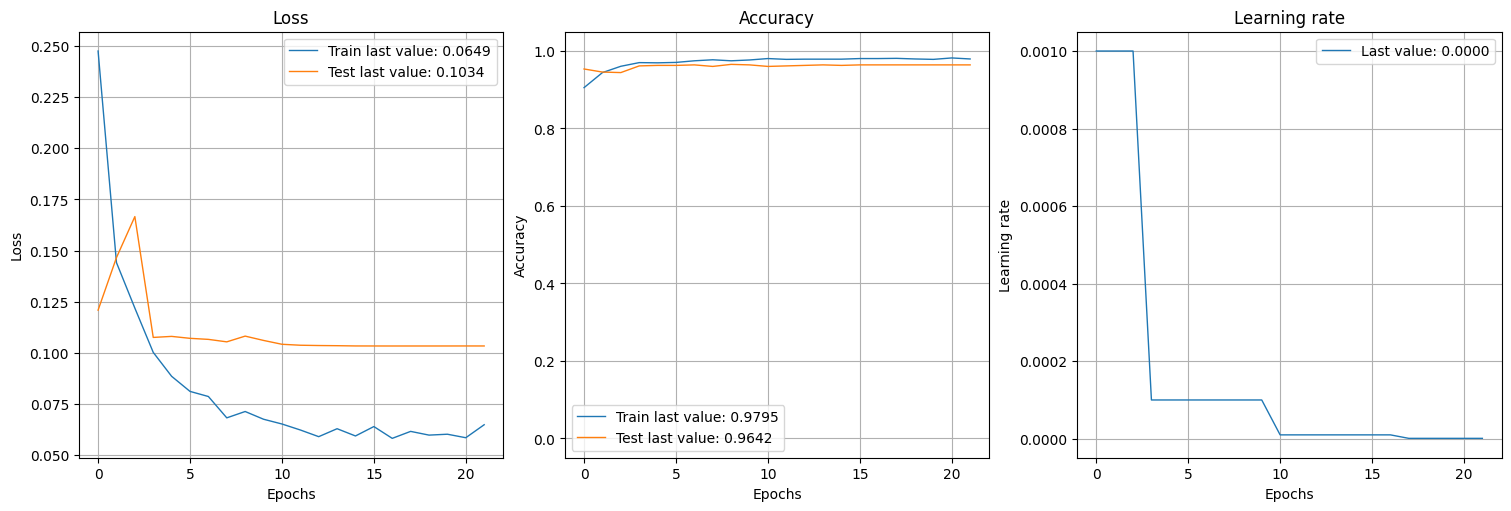

In [144]:
# The graphic
show_history(history)

12/12 [==============================] - 28s 2s/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       174
           1       0.98      0.93      0.95       200

    accuracy                           0.95       374
   macro avg       0.95      0.95      0.95       374
weighted avg       0.95      0.95      0.95       374



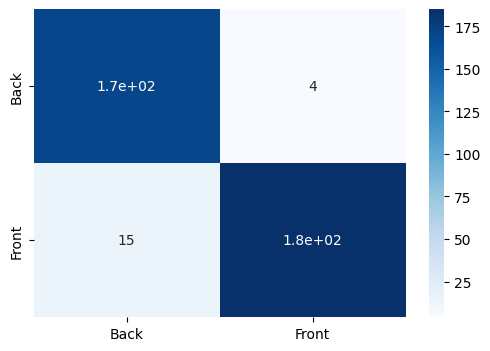

In [145]:
real_test_label = extract_all_labels(dataset_test)
predict_test = model.predict(dataset_test)
predict_test_label = np.argmax(predict_test, axis = 1)
results_prediction(real_test_label, predict_test_label)

60/60 [==============================] - 155s 3s/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       923
           1       0.99      0.97      0.98       982

    accuracy                           0.98      1905
   macro avg       0.98      0.98      0.98      1905
weighted avg       0.98      0.98      0.98      1905



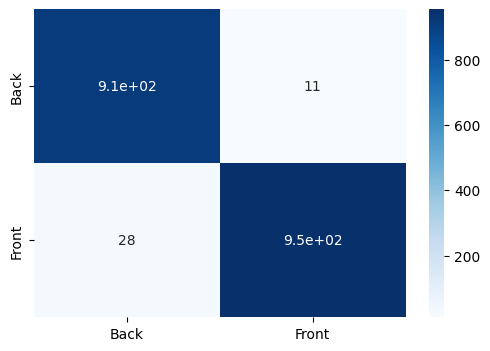

In [146]:
real_train_label = extract_all_labels(dataset_train)
predict_train = model.predict(dataset_train)
predict_train_label = np.argmax(predict_train, axis = 1)
results_prediction(real_train_label, predict_train_label)

24/24 [==============================] - 58s 2s/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       363
           1       0.97      0.96      0.97       392

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755



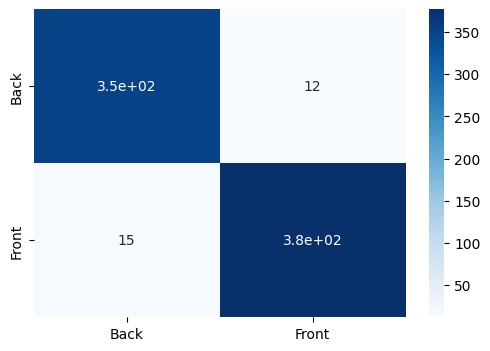

In [147]:
real_val_label = extract_all_labels(dataset_val)
predict_val = model.predict(dataset_val)
predict_val_label = np.argmax(predict_val, axis = 1)
results_prediction(real_val_label, predict_val_label)

In [287]:
# We create the model
with tf.device('/gpu:0'): 
    model, preprocess_input = create_model_fct(optimizer='adam')

# Callback
# We follow the loss
# We stop training if the model has not improve after x step (patience)
# We register the model after each improvement

model_save_path = "./model_best_weights_V3.h5"
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)
callbacks_list = [checkpoint, es, reduce_lr]

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_13[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

 ormalization)                                                                                    
                                                                                                  
 block4_sepconv2_act (Activ  (None, 37, 37, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 37, 37, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 37, 37, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
          

 ation)                                                                                           
                                                                                                  
 block7_sepconv1 (Separable  (None, 19, 19, 728)          536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 19, 19, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 19, 19, 728)          0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
          

 block9_sepconv3_bn (BatchN  (None, 19, 19, 728)          2912      ['block9_sepconv3[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 add_127 (Add)               (None, 19, 19, 728)          0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_126[0][0]']             
                                                                                                  
 block10_sepconv1_act (Acti  (None, 19, 19, 728)          0         ['add_127[0][0]']             
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 19, 19, 728)          536536    ['block10_sepconv1_act[0][0]']
 eConv2D) 

                                                                                                  
 block12_sepconv3_act (Acti  (None, 19, 19, 728)          0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 19, 19, 728)          536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 19, 19, 728)          2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_130 (

In [157]:
time1 = time.time()

with tf.device('/gpu:0'): 
    history = model.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=32, epochs=50, callbacks=callbacks_list, verbose=1)

elapsed_time = time.time() - time1

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.2205 - accuracy: 0.9097
Epoch 1: val_loss improved from inf to 0.13160, saving model to ./model_best_weights_V3.h5


/Users/ruben/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 197s 3s/step - loss: 0.2205 - accuracy: 0.9097 - val_loss: 0.1316 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.1238 - accuracy: 0.9575
Epoch 2: val_loss improved from 0.13160 to 0.11744, saving model to ./model_best_weights_V3.h5
60/60 [==============================] - 190s 3s/step - loss: 0.1238 - accuracy: 0.9575 - val_loss: 0.1174 - val_accuracy: 0.9563 - lr: 0.0010
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.1155 - accuracy: 0.9591
Epoch 3: val_loss did not improve from 0.11744
60/60 [==============================] - 194s 3s/step - loss: 0.1155 - accuracy: 0.9591 - val_loss: 0.1448 - val_accuracy: 0.9510 - lr: 0.0010
Epoch 4/50
60/60 [==============================] - ETA: 0s - loss: 0.0920 - accuracy: 0.9664
Epoch 4: val_loss improved from 0.11744 to 0.11680, saving model to ./model_best_weights_V3.h5
60/60 [==============================] - 198s 3s/ste

In [288]:
# Let's see the results

model.load_weights(model_save_path)

time_dif = time.time()

loss, accuracy_train = model.evaluate(dataset_train, verbose=True)
print("Accuracy on the train dataset: {:.2f}%".format(accuracy_train*100))

elapsed_time = time.time() - time_dif

loss, accuracy_val = model.evaluate(dataset_val, verbose=True)
print("Accuracy on the validation dataset: {:.2f}%".format(accuracy_val*100))

loss, accuracy_test = model.evaluate(dataset_test, verbose=True)
print("Accuracy on the test dataset:  {:.2f}%".format(accuracy_test*100))

# We log the results, model name, path, time by image, accuracy and fitting between train and test
result_models.append(["Xception", model_save_path, elapsed_time / 1905, 
                      accuracy_train, accuracy_val, accuracy_test, accuracy_train/accuracy_test])

60/60 [==============================] - 158s 3s/step - loss: 0.0359 - accuracy: 0.9900
Accuracy on the train dataset: 99.00%
24/24 [==============================] - 62s 3s/step - loss: 0.1127 - accuracy: 0.9669
Accuracy on the validation dataset: 96.69%
12/12 [==============================] - 30s 3s/step - loss: 0.1964 - accuracy: 0.9492
Accuracy on the test dataset:  94.92%


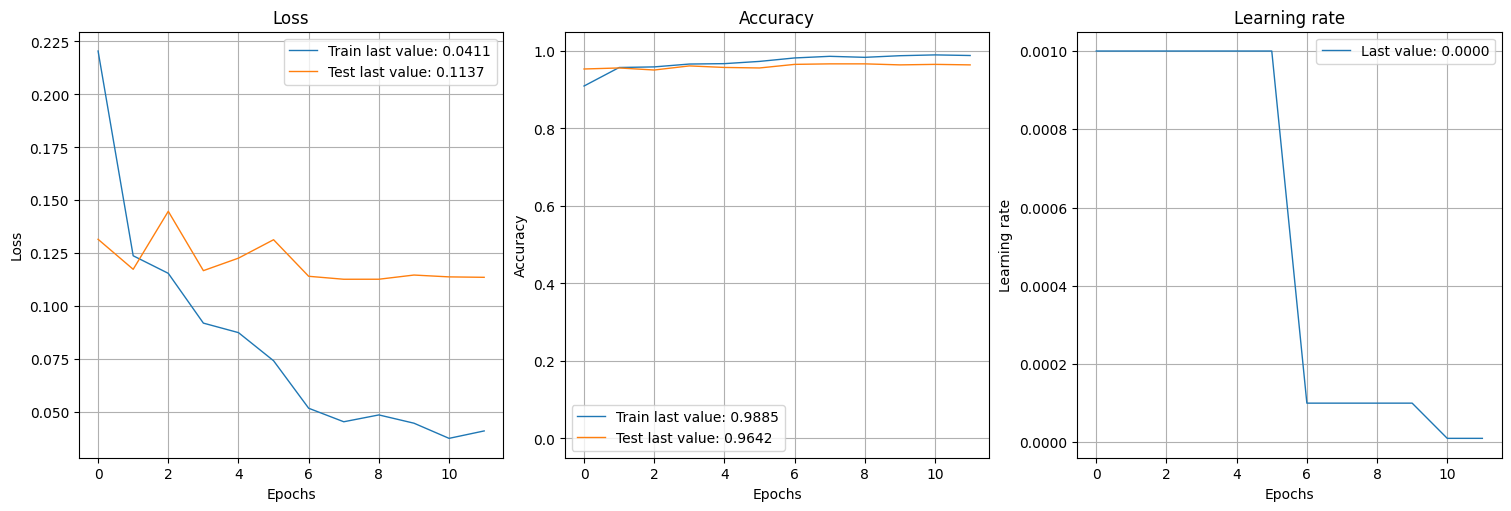

In [159]:
# The graphic
show_history(history)

12/12 [==============================] - 30s 2s/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       174
           1       0.98      0.93      0.95       200

    accuracy                           0.95       374
   macro avg       0.95      0.95      0.95       374
weighted avg       0.95      0.95      0.95       374



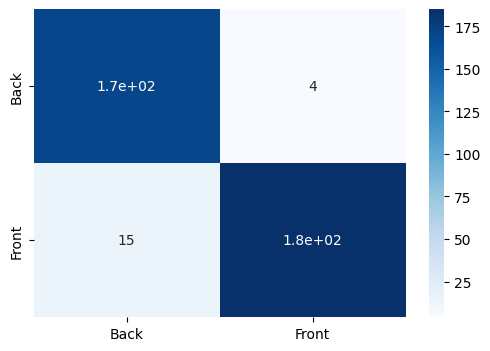

In [160]:
real_test_label = extract_all_labels(dataset_test)
predict_test = model.predict(dataset_test)
predict_test_label = np.argmax(predict_test, axis = 1)
results_prediction(real_test_label, predict_test_label)

60/60 [==============================] - 152s 3s/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       933
           1       0.99      0.99      0.99       972

    accuracy                           0.99      1905
   macro avg       0.99      0.99      0.99      1905
weighted avg       0.99      0.99      0.99      1905



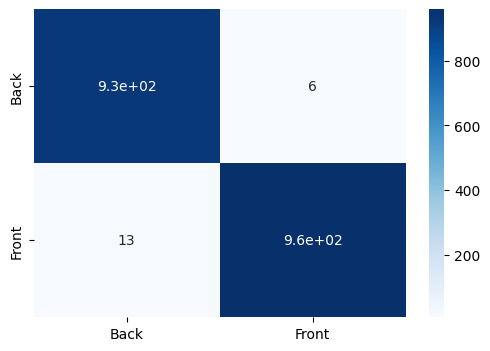

In [161]:
real_train_label = extract_all_labels(dataset_train)
predict_train = model.predict(dataset_train)
predict_train_label = np.argmax(predict_train, axis = 1)
results_prediction(real_train_label, predict_train_label)

24/24 [==============================] - 59s 2s/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       361
           1       0.97      0.96      0.97       394

    accuracy                           0.97       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.97      0.97      0.97       755



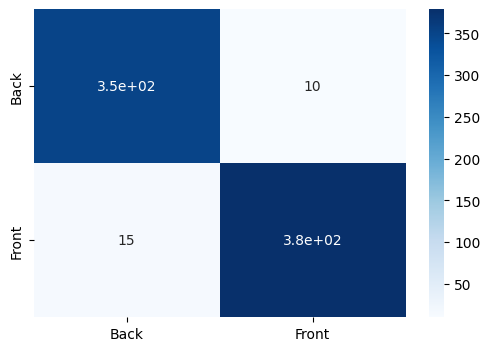

In [162]:
real_val_label = extract_all_labels(dataset_val)
predict_val = model.predict(dataset_val)
predict_val_label = np.argmax(predict_val, axis = 1)
results_prediction(real_val_label, predict_val_label)

In [289]:
def fine_tune_model(model, layers_trained = -10, optimizer='rmsprop'):
    """
    Fine-tune the model by training only the last layer
    """
    # Freeze all layers except the last one
    for layer in model.layers[layers_trained:]:
        layer.trainable = True

    # Recompile the model to apply the changes
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    print(model.summary())

    return model

# Fine-tune the model by training only the last layer
finetuned_model = fine_tune_model(model, optimizer="adam")



Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_13[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

 ormalization)                                                                                    
                                                                                                  
 block4_sepconv2_act (Activ  (None, 37, 37, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 37, 37, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 37, 37, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
          

 ation)                                                                                           
                                                                                                  
 block7_sepconv1 (Separable  (None, 19, 19, 728)          536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 19, 19, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 19, 19, 728)          0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
          

 block9_sepconv3_bn (BatchN  (None, 19, 19, 728)          2912      ['block9_sepconv3[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 add_127 (Add)               (None, 19, 19, 728)          0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_126[0][0]']             
                                                                                                  
 block10_sepconv1_act (Acti  (None, 19, 19, 728)          0         ['add_127[0][0]']             
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 19, 19, 728)          536536    ['block10_sepconv1_act[0][0]']
 eConv2D) 

                                                                                                  
 block12_sepconv3_act (Acti  (None, 19, 19, 728)          0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 19, 19, 728)          536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 19, 19, 728)          2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_130 (

In [290]:
model_save_path = "./model_best_weights_V4.h5"
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)
callbacks_list = [checkpoint, es, reduce_lr]

In [171]:
time1 = time.time()

with tf.device('/gpu:0'): 
    history = finetuned_model.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=32, epochs=50, callbacks=callbacks_list, verbose=1)

elapsed_time = time.time() - time1

print("It took %d time" %elapsed_time)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.1911 - accuracy: 0.9522
Epoch 1: val_loss improved from inf to 0.21300, saving model to ./model_best_weights_V4.h5


/Users/ruben/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 222s 4s/step - loss: 0.1911 - accuracy: 0.9522 - val_loss: 0.2130 - val_accuracy: 0.9298 - lr: 0.0010
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.9785
Epoch 2: val_loss improved from 0.21300 to 0.19129, saving model to ./model_best_weights_V4.h5
60/60 [==============================] - 224s 4s/step - loss: 0.0556 - accuracy: 0.9785 - val_loss: 0.1913 - val_accuracy: 0.9563 - lr: 0.0010
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9921
Epoch 3: val_loss did not improve from 0.19129
60/60 [==============================] - 224s 4s/step - loss: 0.0183 - accuracy: 0.9921 - val_loss: 0.2577 - val_accuracy: 0.9603 - lr: 0.0010
Epoch 4/50
60/60 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9990
Epoch 4: val_loss did not improve from 0.19129
60/60 [==============================] - 261s 4s/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 

In [291]:
# Let's see the results

finetuned_model.load_weights(model_save_path)

time_dif = time.time()

loss, accuracy_train = finetuned_model.evaluate(dataset_train, verbose=True)
print("Accuracy on the train dataset: {:.2f}%".format(accuracy_train*100))

elapsed_time = time.time() - time_dif

loss, accuracy_val = finetuned_model.evaluate(dataset_val, verbose=True)
print("Accuracy on the validation dataset: {:.2f}%".format(accuracy_val*100))

loss, accuracy_test = finetuned_model.evaluate(dataset_test, verbose=True)
print("Accuracy on the test dataset:  {:.2f}%".format(accuracy_test*100))

# We log the results, model name, path, time by image, accuracy and fitting between train and test
result_models.append(["Xception", model_save_path, elapsed_time / 1905, 
                      accuracy_train, accuracy_val, accuracy_test, accuracy_train/accuracy_test])

60/60 [==============================] - 157s 3s/step - loss: 0.0191 - accuracy: 0.9911
Accuracy on the train dataset: 99.11%
24/24 [==============================] - 61s 3s/step - loss: 0.1913 - accuracy: 0.9563
Accuracy on the validation dataset: 95.63%
12/12 [==============================] - 30s 3s/step - loss: 0.2525 - accuracy: 0.9572
Accuracy on the test dataset:  95.72%


In [244]:
from keras.applications.mobilenet_v2 import MobileNetV2

def create_model_fct_MobileNetV2(optimizer='rmsprop'):
    """
    Return a Xception model trained on imagenet
    """
    
    model_base = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

    # We keep the weights of the model trained on imagenet
    for layer in model_base.layers:
        layer.trainable = False

    x = model_base.output
    # We add the last layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # We want to predict 2 classes
    predictions = Dense(2, activation='softmax')(x)

    # We define the model
    model = Model(inputs=model_base.input, outputs=predictions)
    
    # We compile it
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    #alternative : adam
    
    print(model.summary())
    
    return model, preprocess_input

In [292]:

# We create the model
with tf.device('/gpu:0'): 
    model, preprocess_input = create_model_fct_MobileNetV2(optimizer='adam')

# Callback
# We follow the loss
# We stop training if the model has not improve after x step (patience)
# We register the model after each improvement

model_save_path = "./model_best_weights_V5.h5"
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)
callbacks_list = [checkpoint, es, reduce_lr]

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_14[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']     

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [293]:
# We prepare the files
dataset_train = dataset_fct("images/train", preprocess_input, image_size = (224,224), validation_split=0, data_type=None)
dataset_test = dataset_fct("images/test", preprocess_input, image_size = (224,224), validation_split=0, data_type=None)
dataset_val = dataset_fct("images/validation", preprocess_input, image_size = (224,224), validation_split=0, data_type=None)

# Optimization of dataset

AUTOTUNE = tf.data.experimental.AUTOTUNE

dataset_train = dataset_train.cache().prefetch(buffer_size=AUTOTUNE)
dataset_val = dataset_val.cache().prefetch(buffer_size=AUTOTUNE)
dataset_test = dataset_test.cache().prefetch(buffer_size=AUTOTUNE)

Found 1905 files belonging to 2 classes.
Found 374 files belonging to 2 classes.
Found 755 files belonging to 2 classes.


In [249]:
time1 = time.time()

with tf.device('/gpu:0'): 
    history = model.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=32, epochs=50, callbacks=callbacks_list, verbose=1)

elapsed_time = time.time() - time1

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.2353 - accuracy: 0.9181
Epoch 1: val_loss improved from inf to 0.13319, saving model to ./model_best_weights_V5.h5


/Users/ruben/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 48s 761ms/step - loss: 0.2353 - accuracy: 0.9181 - val_loss: 0.1332 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.1258 - accuracy: 0.9612
Epoch 2: val_loss did not improve from 0.13319
60/60 [==============================] - 42s 707ms/step - loss: 0.1258 - accuracy: 0.9612 - val_loss: 0.1397 - val_accuracy: 0.9483 - lr: 0.0010
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.1070 - accuracy: 0.9633
Epoch 3: val_loss did not improve from 0.13319
60/60 [==============================] - 42s 705ms/step - loss: 0.1070 - accuracy: 0.9633 - val_loss: 0.1380 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 4/50
60/60 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9769
Epoch 4: val_loss improved from 0.13319 to 0.12768, saving model to ./model_best_weights_V5.h5
60/60 [==============================] - 43s 722ms/step - loss: 0.0781 - accuracy: 0.9769 - va

In [294]:
# Let's see the results

model.load_weights(model_save_path)

time_dif = time.time()

loss, accuracy_train = model.evaluate(dataset_train, verbose=True)
print("Accuracy on the train dataset: {:.2f}%".format(accuracy_train*100))

elapsed_time = time.time() - time_dif

loss, accuracy_val = model.evaluate(dataset_val, verbose=True)
print("Accuracy on the validation dataset: {:.2f}%".format(accuracy_val*100))

loss, accuracy_test = model.evaluate(dataset_test, verbose=True)
print("Accuracy on the test dataset:  {:.2f}%".format(accuracy_test*100))

# We log the results, model name, path, time by image, accuracy and fitting between train and test
result_models.append(["Mobilevnet2", model_save_path, elapsed_time / 1905, 
                      accuracy_train, accuracy_val, accuracy_test, accuracy_train/accuracy_test])

60/60 [==============================] - 37s 586ms/step - loss: 0.0534 - accuracy: 0.9837
Accuracy on the train dataset: 98.37%
24/24 [==============================] - 14s 566ms/step - loss: 0.1257 - accuracy: 0.9576
Accuracy on the validation dataset: 95.76%
12/12 [==============================] - 7s 547ms/step - loss: 0.1510 - accuracy: 0.9572
Accuracy on the test dataset:  95.72%


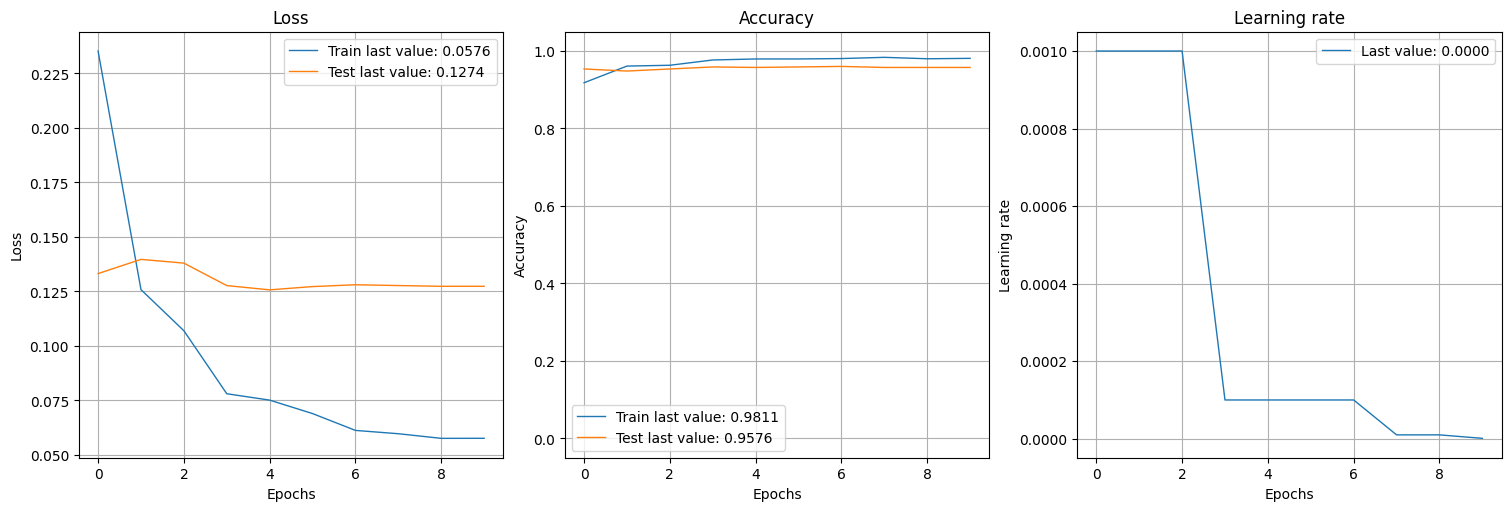

In [251]:
# The graphic
show_history(history)

12/12 [==============================] - 7s 496ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       181
           1       0.97      0.95      0.96       193

    accuracy                           0.96       374
   macro avg       0.96      0.96      0.96       374
weighted avg       0.96      0.96      0.96       374



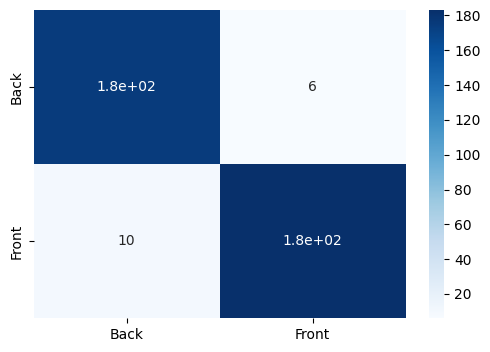

In [252]:
real_test_label = extract_all_labels(dataset_test)
predict_test = model.predict(dataset_test)
predict_test_label = np.argmax(predict_test, axis = 1)
results_prediction(real_test_label, predict_test_label)

60/60 [==============================] - 30s 504ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       927
           1       0.99      0.98      0.98       978

    accuracy                           0.98      1905
   macro avg       0.98      0.98      0.98      1905
weighted avg       0.98      0.98      0.98      1905



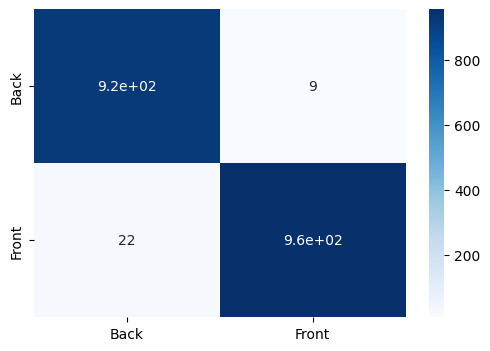

In [253]:
real_train_label = extract_all_labels(dataset_train)
predict_train = model.predict(dataset_train)
predict_train_label = np.argmax(predict_train, axis = 1)
results_prediction(real_train_label, predict_train_label)

24/24 [==============================] - 12s 508ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       354
           1       0.97      0.95      0.96       401

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755



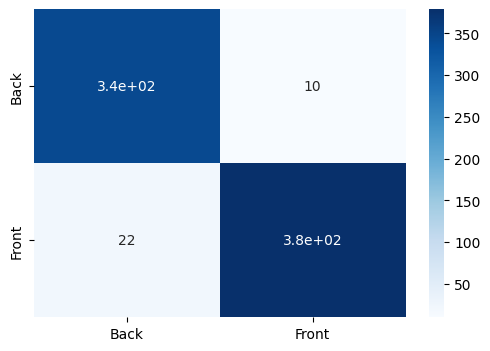

In [254]:
real_val_label = extract_all_labels(dataset_val)
predict_val = model.predict(dataset_val)
predict_val_label = np.argmax(predict_val, axis = 1)
results_prediction(real_val_label, predict_val_label)

In [295]:
# Fine-tune the model by training only the last layer
fine_tuned_model = fine_tune_model(model, layers_trained=-50, optimizer="adam")



Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_14[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']     

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [296]:
model_save_path = "./model_best_weights_V6.h5"
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)
callbacks_list = [checkpoint, es, reduce_lr]

In [268]:
time1 = time.time()

with tf.device('/gpu:0'): 
    history = fine_tuned_model.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=32, epochs=50, callbacks=callbacks_list, verbose=1)

elapsed_time = time.time() - time1

print("It took %d time" %elapsed_time)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 0.1130 - accuracy: 0.9759
Epoch 1: val_loss improved from inf to 3.88751, saving model to ./model_best_weights_V6.h5
60/60 [==============================] - 63s 985ms/step - loss: 0.1130 - accuracy: 0.9759 - val_loss: 3.8875 - val_accuracy: 0.9126 - lr: 0.0010
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9822
Epoch 2: val_loss improved from 3.88751 to 3.62454, saving model to ./model_best_weights_V6.h5
60/60 [==============================] - 59s 984ms/step - loss: 0.0466 - accuracy: 0.9822 - val_loss: 3.6245 - val_accuracy: 0.9377 - lr: 0.0010
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9958
Epoch 3: val_loss did not improve from 3.62454
60/60 [==============================] - 59s 992ms/step - loss: 0.0187 - accuracy: 0.9958 - val_loss: 5.2816 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 4/50
60/60 [==============================] 

60/60 [==============================] - ETA: 0s - loss: 1.7781e-05 - accuracy: 1.0000
Epoch 25: val_loss improved from 0.65252 to 0.62207, saving model to ./model_best_weights_V6.h5
60/60 [==============================] - 62s 1s/step - loss: 1.7781e-05 - accuracy: 1.0000 - val_loss: 0.6221 - val_accuracy: 0.9576 - lr: 1.0000e-04
Epoch 26/50
60/60 [==============================] - ETA: 0s - loss: 2.0996e-05 - accuracy: 1.0000
Epoch 26: val_loss improved from 0.62207 to 0.59459, saving model to ./model_best_weights_V6.h5
60/60 [==============================] - 60s 997ms/step - loss: 2.0996e-05 - accuracy: 1.0000 - val_loss: 0.5946 - val_accuracy: 0.9589 - lr: 1.0000e-04
Epoch 27/50
60/60 [==============================] - ETA: 0s - loss: 1.5900e-05 - accuracy: 1.0000
Epoch 27: val_loss improved from 0.59459 to 0.56979, saving model to ./model_best_weights_V6.h5
60/60 [==============================] - 60s 1s/step - loss: 1.5900e-05 - accuracy: 1.0000 - val_loss: 0.5698 - val_accuracy

Epoch 49/50
60/60 [==============================] - ETA: 0s - loss: 3.9867e-06 - accuracy: 1.0000
Epoch 49: val_loss improved from 0.37789 to 0.37561, saving model to ./model_best_weights_V6.h5
60/60 [==============================] - 62s 1s/step - loss: 3.9867e-06 - accuracy: 1.0000 - val_loss: 0.3756 - val_accuracy: 0.9523 - lr: 1.0000e-04
Epoch 50/50
60/60 [==============================] - ETA: 0s - loss: 4.5446e-06 - accuracy: 1.0000
Epoch 50: val_loss improved from 0.37561 to 0.37351, saving model to ./model_best_weights_V6.h5
60/60 [==============================] - 61s 1s/step - loss: 4.5446e-06 - accuracy: 1.0000 - val_loss: 0.3735 - val_accuracy: 0.9523 - lr: 1.0000e-04
It took 3078 time


In [298]:
# Let's see the results

fine_tuned_model.load_weights(model_save_path)

time_dif = time.time()

loss, accuracy_train = fine_tuned_model.evaluate(dataset_train, verbose=True)
print("Accuracy on the train dataset: {:.2f}%".format(accuracy_train*100))

elapsed_time = time.time() - time_dif

loss, accuracy_val = fine_tuned_model.evaluate(dataset_val, verbose=True)
print("Accuracy on the validation dataset: {:.2f}%".format(accuracy_val*100))

loss, accuracy_test = fine_tuned_model.evaluate(dataset_test, verbose=True)
print("Accuracy on the test dataset:  {:.2f}%".format(accuracy_test*100))

# We log the results, model name, path, time by image, accuracy and fitting between train and test
result_models.append(["Mobilevnet2", model_save_path, elapsed_time / 1905, 
                      accuracy_train, accuracy_val, accuracy_test, accuracy_train/accuracy_test])

60/60 [==============================] - 34s 566ms/step - loss: 2.7839e-04 - accuracy: 1.0000
Accuracy on the train dataset: 100.00%
24/24 [==============================] - 14s 585ms/step - loss: 0.3735 - accuracy: 0.9523
Accuracy on the validation dataset: 95.23%
12/12 [==============================] - 7s 589ms/step - loss: 0.8978 - accuracy: 0.9385
Accuracy on the test dataset:  93.85%


12/12 [==============================] - 8s 576ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       178
           1       0.96      0.92      0.94       196

    accuracy                           0.94       374
   macro avg       0.94      0.94      0.94       374
weighted avg       0.94      0.94      0.94       374



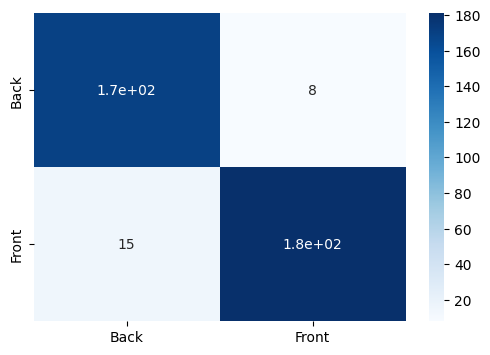

In [270]:
real_test_label = extract_all_labels(dataset_test)
predict_test = model.predict(dataset_test)
predict_test_label = np.argmax(predict_test, axis = 1)
results_prediction(real_test_label, predict_test_label)

60/60 [==============================] - 37s 615ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      1.00      1.00       965

    accuracy                           1.00      1905
   macro avg       1.00      1.00      1.00      1905
weighted avg       1.00      1.00      1.00      1905



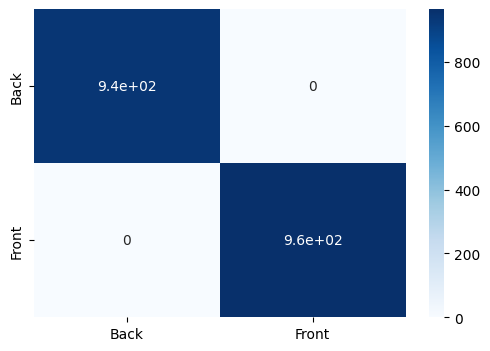

In [271]:
real_train_label = extract_all_labels(dataset_train)
predict_train = model.predict(dataset_train)
predict_train_label = np.argmax(predict_train, axis = 1)
results_prediction(real_train_label, predict_train_label)

24/24 [==============================] - 15s 625ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       364
           1       0.96      0.95      0.95       391

    accuracy                           0.95       755
   macro avg       0.95      0.95      0.95       755
weighted avg       0.95      0.95      0.95       755



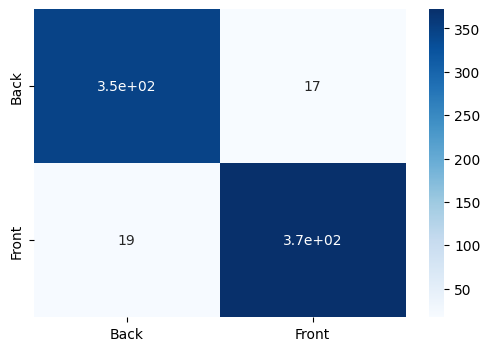

In [272]:
real_val_label = extract_all_labels(dataset_val)
predict_val = model.predict(dataset_val)
predict_val_label = np.argmax(predict_val, axis = 1)
results_prediction(real_val_label, predict_val_label)

In [299]:
# Transform to dataframe
df_result_models = pd.DataFrame(result_models, columns = ["Model", "Path", "Time processing 1 image", 
                                                          "accuracy_train", "accuracy_val", "accuracy_test",
                                                         "fitting_train_test"])

In [332]:
df_result_models

Model                        Path  Time processing 1 image  \
0     Xception     ./model_best_weights.h5                 0.084514   
1     Xception  ./model_best_weights_V2.h5                 0.081890   
2     Xception  ./model_best_weights_V3.h5                 0.082940   
3     Xception  ./model_best_weights_V4.h5                 0.082415   
4  Mobilevnet2  ./model_best_weights_V5.h5                 0.019423   
5  Mobilevnet2  ./model_best_weights_V6.h5                 0.018373   

   accuracy_train  accuracy_val  accuracy_test  fitting_train_test  
0        0.962205      0.958940       0.951872            1.010856  
1        0.979528      0.964238       0.949198            1.031953  
2        0.990026      0.966887       0.949198            1.043014  
3        0.991076      0.956291       0.957219            1.035370  
4        0.983727      0.957616       0.957219            1.027693  
5        1.000000      0.952318       0.938503            1.065527

In [357]:
df_result_models.drop("Path", axis = 1).groupby(['Model']).mean()

Time processing 1 image  accuracy_train  accuracy_val  \
Model                                                                
Mobilevnet2                 0.018898        0.991864      0.954967   
Xception                    0.082940        0.980709      0.961589   

             accuracy_test  fitting_train_test  
Model                                           
Mobilevnet2       0.947861            1.046610  
Xception          0.951872            1.030298

Some models are overfitting a bit.

Accuracy is really high

Comparing Xception models against Mobilevnet2 models show a drastic reduction in time processing, which is a big edge as the accuracy is the same.

The model developped here would have the purpose to process a big library of images. So the Mobilevnet model are the most adequat for this task.

./model_best_weights_V5.h5 will ne chosen as it is fast, highly accurate and with a small overfitting.

We could work on this later on with better finetuning.

Also, the big win using mobilevnetv2 is the small weight it has compare to xception (80 mb against 10 mb). It is a big win for putting this model on a API online.

In [358]:
import pickle

In [359]:
# To save the model and preprocess
def save_model(model, preprocess_input, model_save_path):
    model.save(model_save_path)
    with open("preprocess_input.pkl", "wb") as f:
        pickle.dump(preprocess_input, f)

In [361]:
model, preprocess_input = create_model_fct_MobileNetV2(optimizer='adam')

model_save_path = "./model_best_weights_V5.h5"

model.load_weights(model_save_path)

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_16[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']     

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [362]:
# Save the model
save_model(model, preprocess_input, model_save_path)

/Users/ruben/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [363]:
## To reload model

def load_model(model_save_path):
    model = tf.keras.models.load_model(model_save_path)
    with open("preprocess_input.pkl", "rb") as f:
        preprocess_input = pickle.load(f)
    return model, preprocess_input

# Load the model in another project
loaded_model, loaded_preprocess_input = load_model(model_save_path)


24/24 [==============================] - 16s 575ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       354
           1       0.97      0.95      0.96       401

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755



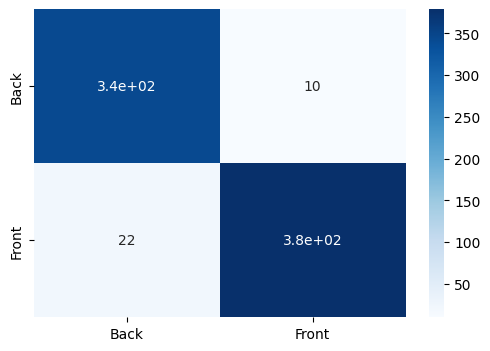

In [364]:
real_val_label = extract_all_labels(dataset_val)
t = loaded_model.predict(dataset_val)
tt = np.argmax(t, axis = 1)
results_prediction(real_val_label, tt)

Good, we have the same result